## DATA
手寫辨識資料集digit: 

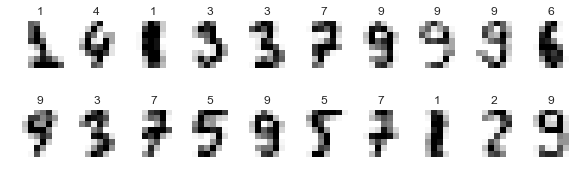

In [2]:
# Day46_HW_submit
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')  #圖為 "白底黑字" 
fig, axes = plt.subplots(2, 10, figsize=(10, 3)) #兩列十欄  圖長寬比 10:3

digits = datasets.load_digits()

for ax in axes.ravel():
    i = np.random.randint(0, digits.data.shape[0], 1)[0]
    ax.imshow(digits.data[i].reshape(8, 8))
    ax.axis('off')
    ax.set_title(digits.target[i])

### PCA 範例 Day59

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [ ]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

載入套件

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

載入 digits 資料集

In [4]:
digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

設定 模型 估計參數

In [5]:
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

資料建模 並 視覺化 結果

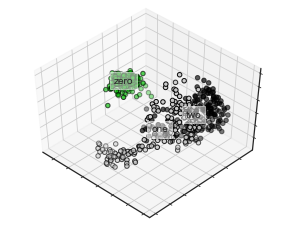

In [6]:
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('zero', 0), 
                    ('one', 1), 
                    ('two', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## PCA 範例 Day60
* 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

In [8]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### penalty='l2' 觀察結果
* explained variance ratio : 解釋變異性隨著 components 穩定下降
* 分類預測準確率 : 似乎也隨著 components 提升, 但是在 20 以後提升不多


#### 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果
> 執行後可以發現, 雖然 explained variance ratio 仍然隨著 components 穩定下降  
> 但是分類預測準確率上升不穩定, 可見 penalty 參數調整為 'l1' 不太適合

In [9]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [17]:
# 執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.912):
{'logistic__alpha': 0.01, 'pca__n_components': 30}


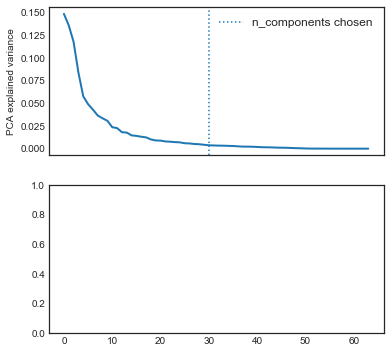

In [18]:
# 繪製不同 components 的 PCA explained variance ratio
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

In [19]:
# 繪製 7 個不同採樣點的 accuracy
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
#參照 Day_060_PCA原檔.ipynb